In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

         data_hora  idade sensação de tristeza ou choro  \
0  6/14/2022 20:02  35-40                           Sim   
1  6/14/2022 20:03  40-45                           Sim   
2  6/14/2022 20:04  35-40                           Sim   
3  6/14/2022 20:05  35-40                           Sim   
4  6/14/2022 20:06  40-45                           Sim   

  irritabilidade com o bebê e o parceiro dificuldade para dormir à Nãoite  \
0                                    Sim     Dois ou mais dias por semana   
1                                    Não                              Não   
2                                    Não                              Sim   
3                                    Sim                              Sim   
4                                    Não     Dois ou mais dias por semana   

  problemas de concentração ou para tomar decisões  \
0                                              Sim   
1                                              Sim   
2                   

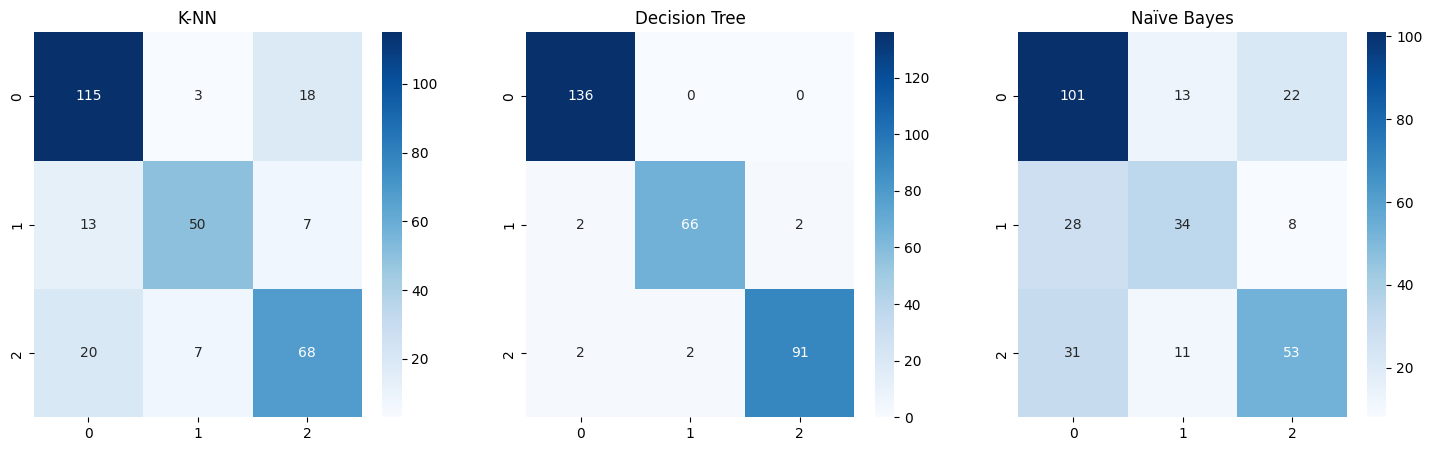

In [5]:
file_path = 'C:/Users/luiar/IA/proje4part1/dep_pos_parto.csv'
data = pd.read_csv(file_path)

print(data.head())
print(data.info())
print(data.describe())

print(data.isnull().sum())

if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'])
    data['year'] = data['date'].dt.year
    data['month'] = data['date'].dt.month
    data['day'] = data['date'].dt.day
    data['hour'] = data['date'].dt.hour
    data.drop('date', axis=1, inplace=True)  

for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

X = data.iloc[:, :-1] 
y = data.iloc[:, -1]   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("K-Nearest Neighbors (K-NN) Results:")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)

print("Decision Tree Results:")
print(confusion_matrix(y_test, y_pred_dtree))
print(classification_report(y_test, y_pred_dtree))

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Naïve Bayes Results:")
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title('K-NN')

sns.heatmap(confusion_matrix(y_test, y_pred_dtree), annot=True, fmt='d', ax=axes[1], cmap='Blues')
axes[1].set_title('Decision Tree')

sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', ax=axes[2], cmap='Blues')
axes[2].set_title('Naïve Bayes')

plt.show()